In [1]:
from lib.preamble import *
%matplotlib widget

In [2]:
paths = glob("../data/2023-10-31/d*.h5")
paths += glob("../data/2023-11-02/d*.h5")

In [3]:
df = pd.DataFrame(list(map(import_map, paths))).set_index("material").sort_index()
df

,wavelength,index,intensity,x,y,number,method,capture,temperature,name,remaining,path
material,,,,,,,,,,,,
CrPS4,"[[400.0, 400.089, 400.178, 400.266, 400.355, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[422.0, 422.5249938964844, 422.2200012207031,...","[8.639999, 8.679999, 8.72, 8.76, 8.8, 8.84, 8....","[-0.76, -0.76, -0.76, -0.76, -0.76, -0.76, -0....",7,reflectance,1x2s,10.0,d231031 LO MG/d007 CrPS3 refl map 1x2s 10K,[map],../data/d231031_LO_MG/d007_CrPS3_refl_map_1x2s...
MnPS3,"[[400.0, 400.089, 400.178, 400.266, 400.355, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[424.0, 424.60101318359375, 424.7470092773437...","[6.550859, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6....","[7.85, 7.85, 7.85, 7.85, 7.85, 7.85, 7.85, 7.8...",6,reflectance,1x2s,10.0,d231031 LO MG/d006 NnPS3 refl map 1x2s 10K,[map],../data/d231031_LO_MG/d006_NnPS3_refl_map_1x2s...
NiPS3,"[[809.965, 810.044, 810.122, 810.201, 810.28, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[865.0, 868.0, 860.0, 863.0, 862.0, 863.0, 86...","[-2.32, -2.28, -2.24, -2.2, -2.16, -2.12, -2.0...","[1.68, 1.68, 1.68, 1.68, 1.68, 1.68, 1.68, 1.6...",4,reflectance,2x2s,10.0,d231031 LO MG/d004 NiPS3 refl map 2x2s 10K,[map],../data/d231031_LO_MG/d004_NiPS3_refl_map_2x2s...
NiPS3,"[[809.965, 810.044, 810.122, 810.201, 810.28, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[[6940.0, 6941.0, 6965.0, 6977.0, 6962.0, 6939...","[-2.04, -2.03, -2.02, -2.01, -2.0, -1.99, -1.9...","[1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, 1.9, ...",5,reflectance,2x2s,10.0,d231031 LO MG/d005 NiPS3 refl map 2x2s 10K,[map],../data/d231031_LO_MG/d005_NiPS3_refl_map_2x2s...


# Spectral analysis

/home/leon/Projekte/Studium/2023_WS/batchelorarbeit/src/lib/utils.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1239.84187/ev


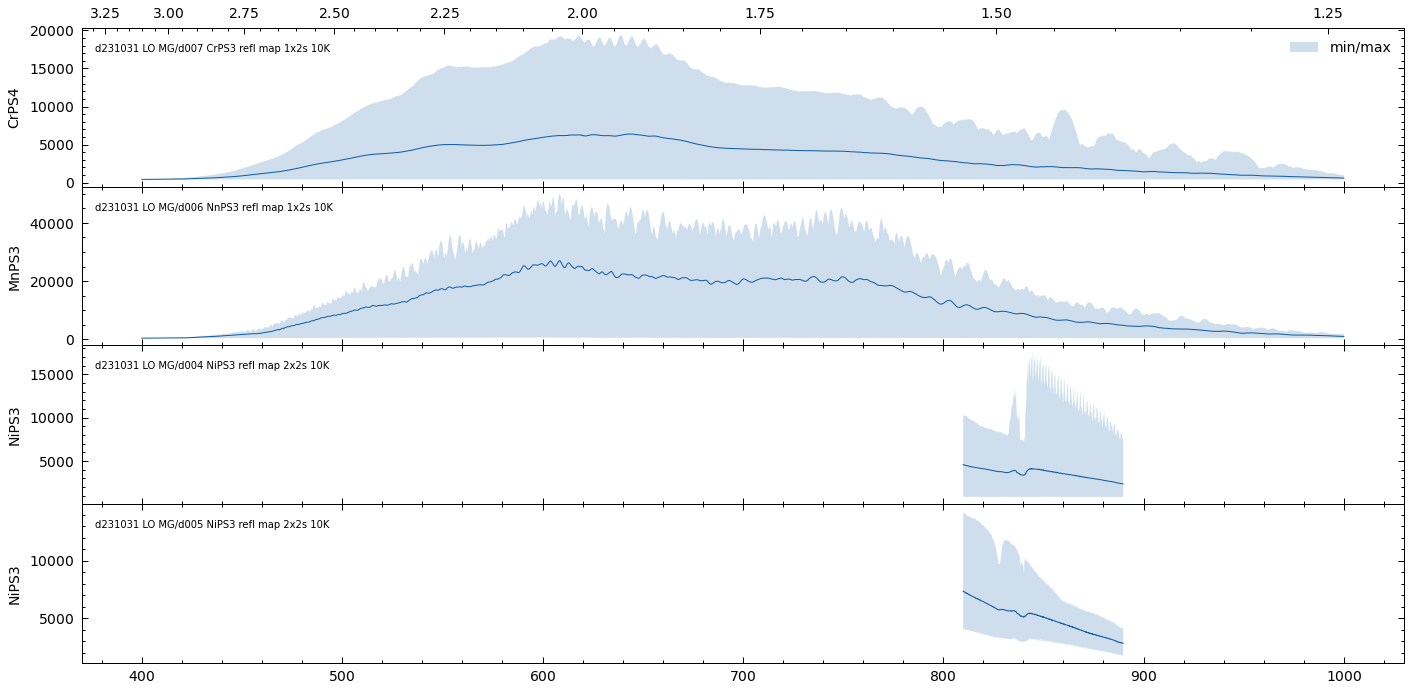

In [4]:
sel = df
fig, ax = plot.stack(len(sel), figsize=(10, 5))
for i, (a, (name, row)) in enumerate(zip(ax, sel.iterrows())):
	a.plot(row.wavelength.mean(0), row.intensity.mean(0))
	a.fill_between(
		row.wavelength.mean(0),
		row.intensity.max(0),
		row.intensity.min(0),
		alpha=.2,
		label="min/max"
	)
	a.set_ylabel(name)
ax[0].legend()
plot.energy_ticks(ax[0])
plot.footnote(ax, df.name)

# Image

## **legacy**: using triangulation
This doesn't even assume a regular grid

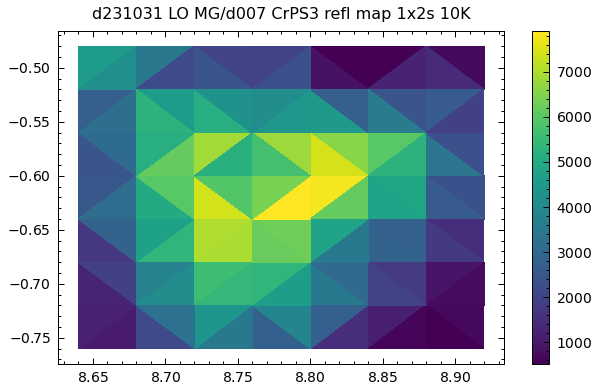

In [5]:
sel = df.iloc[0]

x = sel.x
y = sel.y
z = sel.intensity.mean(-1)

# triangulate x,y 
import matplotlib.tri as mtri
tri = mtri.Triangulation(x, y)

# plot the contour
plt.figure()
plt.title(sel["name"])
plt.tripcolor(tri, z, shading='flat')
plt.colorbar()
plt.show()

In [6]:
df["step"] = df.apply(estimate_step, axis=1)

## assuming a regular grid

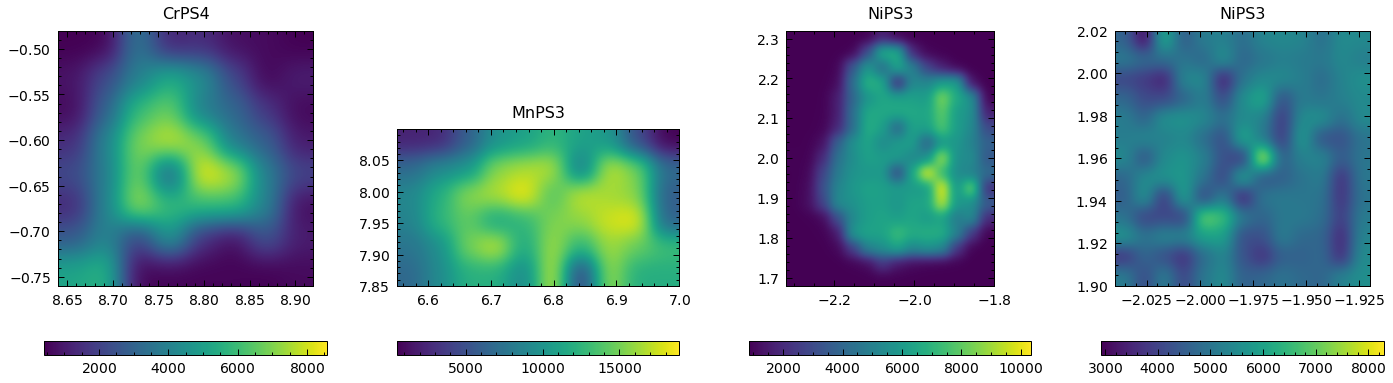

In [12]:
sel = df
def reduce_spectrum(row):
	# return interp1d(row.wavelength.mean(0), row.intensity)(840) / interp1d(row.wavelength.mean(0), row.intensity)(830)
	# return interp1d(row.wavelength.mean(0), row.intensity)(840)
	return row.intensity.mean(-1)

fig, ax = plt.subplots(1, len(sel), figsize=(10, 3))

for i, (a, (name, row)) in enumerate(zip(ax, sel.iterrows())):
	a.set_title(name)
	img = a.imshow(
		reduce_spectrum(row).reshape(-1, row.step),
		extent=(row.x.min(), row.x.max(), row.y.min(), row.y.max()),
		interpolation="gaussian",
	)
	a.set_aspect("equal")
	fig.colorbar(img, ax=a, location="bottom")

plt.tight_layout()
plt.show()

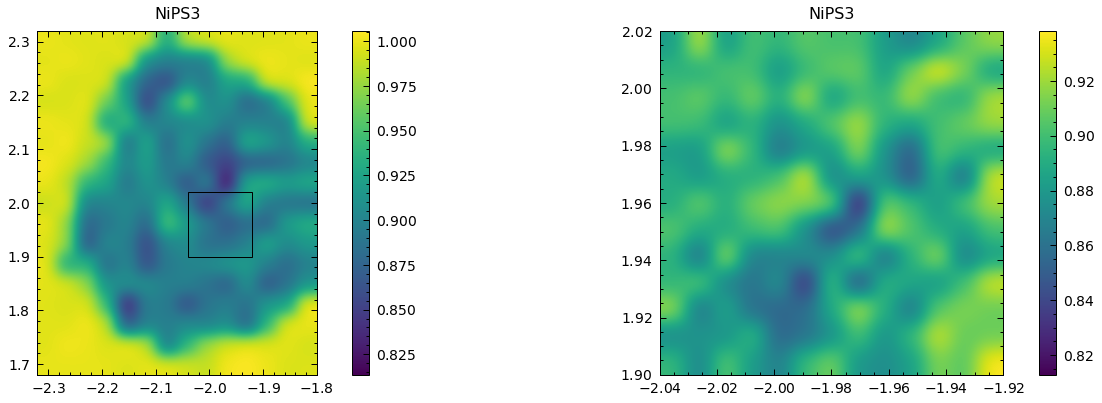

In [8]:
sel = df[df.index=="NiPS3"]

def reduce_spectrum(row):
	return interp1d(row.wavelength.mean(0), row.intensity)(840) / interp1d(row.wavelength.mean(0), row.intensity)(830)
	# return interp1d(row.wavelength.mean(0), row.intensity)(840)

fig, ax = plt.subplots(1, len(sel), figsize=(10, 3))

for i, (a, (name, row)) in enumerate(zip(ax, sel.iterrows())):
	a.set_title(name)
	img = a.imshow(
		reduce_spectrum(row).reshape(-1, row.step),
		extent=(row.x.min(), row.x.max(), row.y.min(), row.y.max()),
		interpolation="gaussian"
	)
	a.set_aspect("equal")
	fig.colorbar(img, ax=a, location="right")

from matplotlib import patches
ax[0].add_patch(patches.Rectangle(
	(ax[1].get_xlim()[0], ax[1].get_ylim()[0]),
	ax[1].get_xlim()[1] - ax[1].get_xlim()[0],
	ax[1].get_ylim()[1] - ax[1].get_ylim()[0],
	fill=False, lw=.5)
)

plt.tight_layout()
plt.show()

# Thickness map

In [9]:
%%time
thicknesses = np.geomspace(10, 1000, 100) # um
df["thickness_signal"] = df.apply(
	lambda x: np.apply_along_axis(
		lambda y: calc_thickness(x.wavelength[0], y, thicknesses*1e3), 
	-1, x.intensity), 
axis=1)

CPU times: user 8.79 s, sys: 127 ms, total: 8.92 s
Wall time: 8.93 s


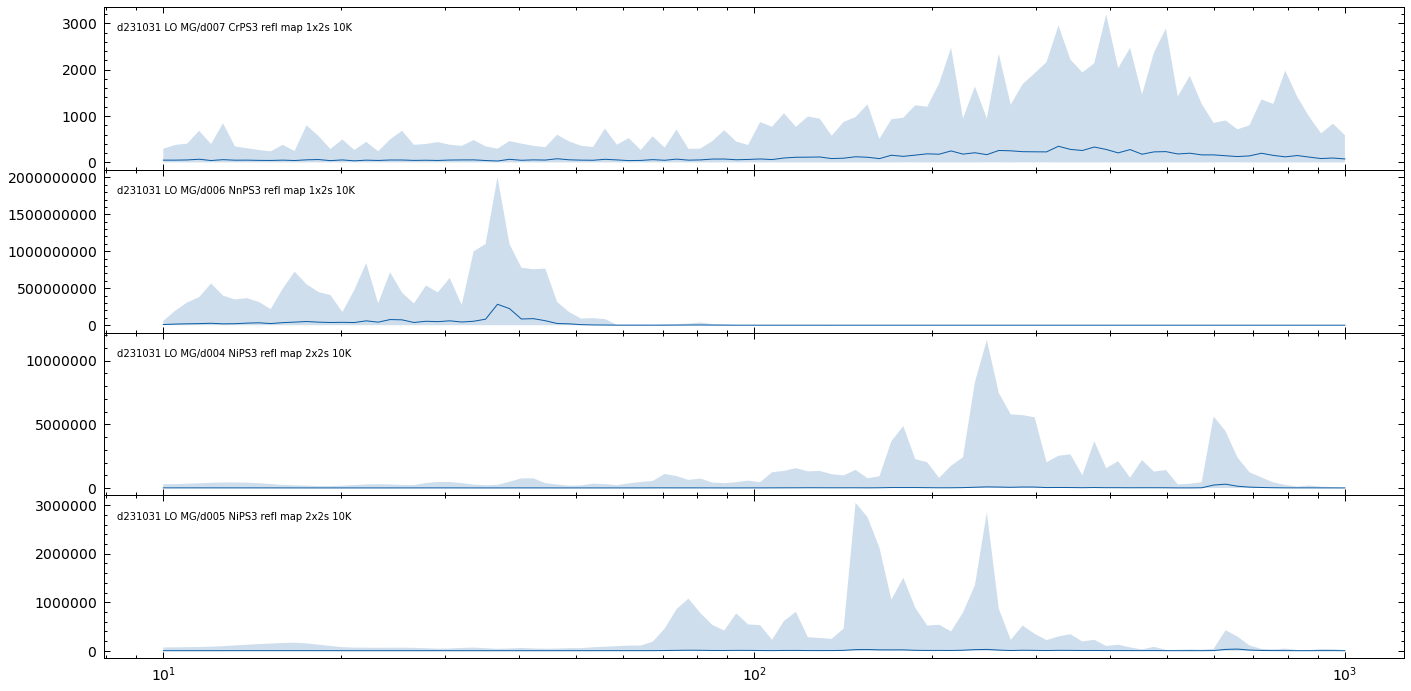

In [10]:
sel = df
fig, ax = plot.stack(len(sel), figsize=(10, 5))
for i, (a, (name, row)) in enumerate(zip(ax, sel.iterrows())):
	a.plot(thicknesses, row.thickness_signal.mean(0), label=name)
	a.fill_between(
		thicknesses,
		row.thickness_signal.max(0),
		row.thickness_signal.min(0),
		alpha=0.2,
	)
	a.set_ylabel(name)
	a.set_xscale("log")
plot.footnote(ax, df.name)

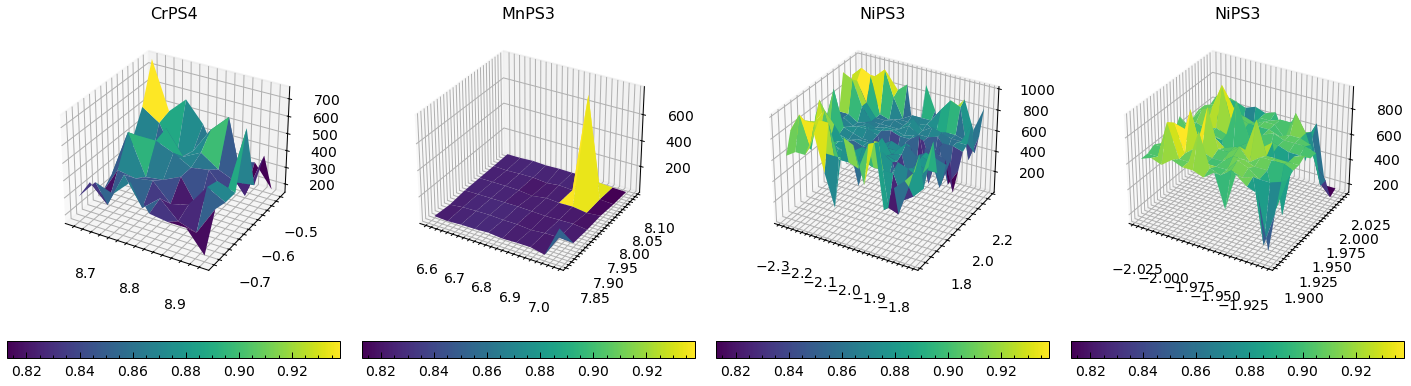

CPU times: user 1.41 s, sys: 1.95 s, total: 3.36 s
Wall time: 1.17 s


In [11]:
%%time
sel = df
def reduce_spectrum(row):
	return thicknesses[np.argmax(row.thickness_signal, axis=-1)]

fig, ax = plt.subplots(1, len(sel), figsize=(10, 3), subplot_kw={"projection": "3d"})

for i, (a, (name, row)) in enumerate(zip(ax, sel.iterrows())):
	a.set_title(name)
	# img = a.imshow(
	# 	reduce_spectrum(row).reshape(-1, row.step),
	# 	extent=(row.x.min(), row.x.max(), row.y.min(), row.y.max()),
	# 	# interpolation="gaussian",
	# )
	a.plot_surface(
		row.x.reshape(-1, row.step),
		row.y.reshape(-1, row.step),
		reduce_spectrum(row).reshape(-1, row.step),
		cmap="viridis",
	)
	# a.set_aspect("equal")
	fig.colorbar(img, ax=a, location="bottom")

plt.tight_layout()
plt.show()